# Neural Network Inference

- Neural Networks are a large trend and widely used in many applications.
- Inference is the process of using a trained neural network to make predictions.
- Inference on encrypted data could enable predictions on sensitive data without revealing the data itself.

Here we demonstrate inference on encrypted data with a CNN and the MNIST dataset.


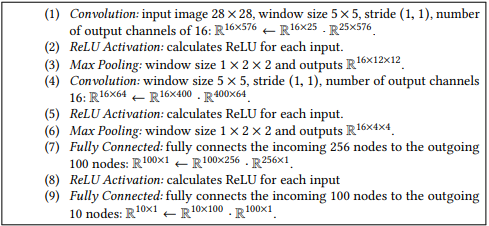

This is the chosen architecture based on MOTION paper allowing for easy implementation

### Open Questions


 - <span style="color:red">Which model architecture was used by which framework  </span>
 - <span style="color:red">Which framework was used for training  </span>
 - <span style="color:red">How is the data to be shared </span>



In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

#### Data Loading

- Data is loaded from the keras datasets module.
- Data can be split horizontally or vertically
- Data is loaded locally since downloading it is prohibited by the proxy

In [16]:
path = 'mnist.npz'
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']
  
#one hot encoding
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, 10)


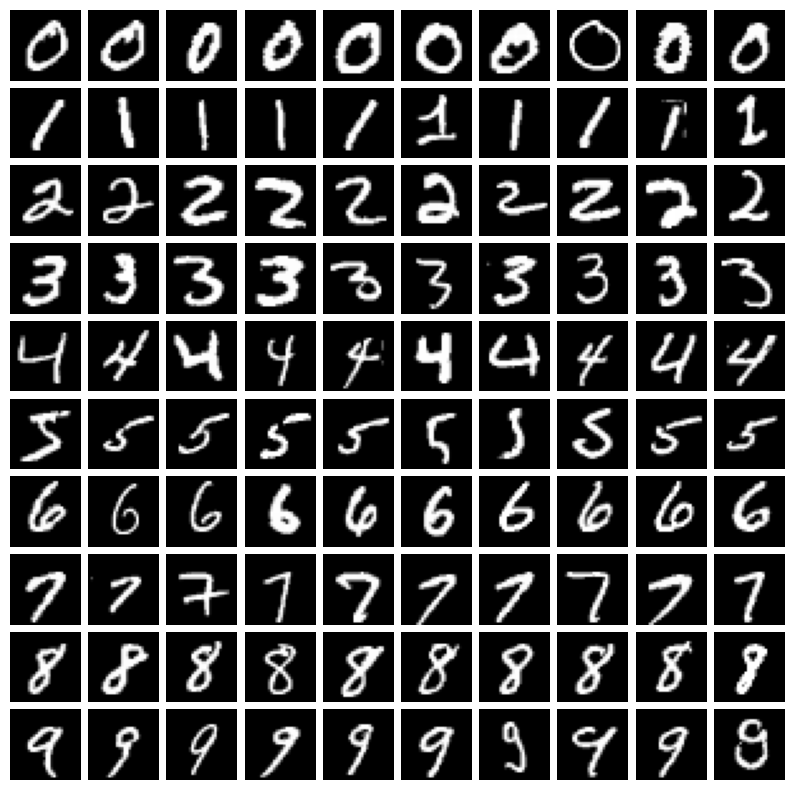

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of images per class to plot
num_images_per_class = 10

# Get the unique labels/classes in the dataset
unique_labels = np.unique(train_labels)

# Set up the figure and axes
fig, axes = plt.subplots(len(unique_labels), num_images_per_class, figsize=(10, 10))

# Iterate over each unique label/class
for i, label in enumerate(unique_labels):
    # Get the indices of the images belonging to the current label/class
    indices = np.where(train_labels == label)[0]
    
    # Select the first num_images_per_class indices
    indices = indices[:num_images_per_class]
    
    # Plot the images
    for j, index in enumerate(indices):
        image = train_examples[index]
        axes[i, j].imshow(image.reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Save the figure as a JPG image
plt.savefig('MNIST_Image.jpg', format='jpg')

# Display the figure
plt.show()


In [3]:
train_examples.shape

(60000, 28, 28)

#### Training (Not done in the workload)

Here we can define our own model but in the workloads a pretrained model is used for inference

In [4]:
# Define a simple sequential model
def create_model():
	# Create the LeNet model
	model = tf.keras.Sequential()

	# Add the first convolutional layer
	model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
	# Add the first max pooling layer
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
	# Add the second convolutional layer
	model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
	# Add the second max pooling layer
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
	# Flatten the input
	model.add(tf.keras.layers.Flatten())
	# Add a fully connected layer
	model.add(tf.keras.layers.Dense(units=100, activation='relu'))
	# Add another fully connected layer
	model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
	# Compile the model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

	return model

# Create a basic model instance
model = create_model()

In [5]:
# Train the model
log=model.fit(train_examples, train_labels, epochs=5,verbose=1)

#### Using the trained model to perform inference

Here we use the previously trained model but in the workload the weights would be loaded from a file
Inference is performed for the test data and the accuracy is calculated

In [6]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_examples, test_labels, verbose=2)

313/313 - 2s - loss: 0.0493 - accuracy: 0.9844 - 2s/epoch - 8ms/step
